In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ot
#
N=3000

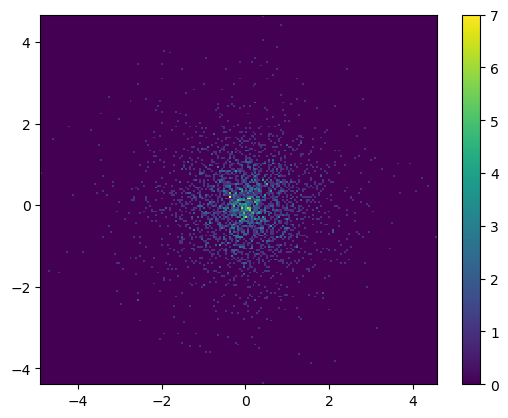

In [2]:
def sersic(Ie, re, r, n):
    bn = 2*n - 1/3
    return Ie * np.exp(-bn*((r/re)**(1/n)-1))

def prob(Ie, re, r, n):
    return sersic(Ie, re, r, n) * 2*np.pi*r
    
n = 1; re = 1; Ie = 1
rmax = 5*re
r = np.random.uniform(0,rmax,5*N)
p = np.random.uniform(0,prob(1, re, re, n),5*N)

mask = p <= prob(1, re, r, n)
r = (r[mask])[:N]

theta = np.random.uniform(0,2*np.pi,N)
rx = r*np.cos(theta)
ry = r*np.sin(theta)

plt.hist2d(rx, ry, bins=200)
plt.colorbar();
x1 = [rx, ry]
x1 = np.stack(np.rot90(x1))

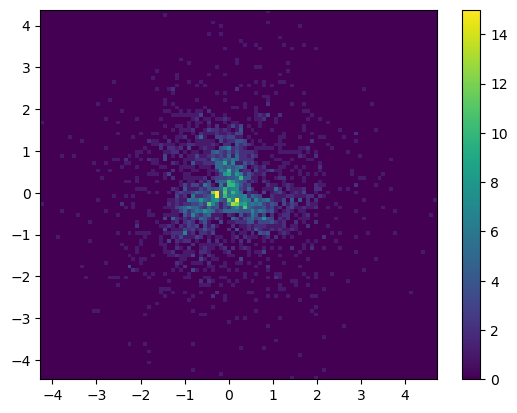

In [3]:
def spiral(r, phi, Ie, re, n, Na, w, p):
    return sersic(Ie, re, r, n) * (1 + w*np.sin(Na/np.tan(p) * np.log10(r) - Na*phi))

def spiralprob(r, phi, Ie, re, n, Na, w, p):
    return spiral(r, phi, Ie, re, n, Na, w, p) * r
    
n = 1; re = 1; Ie = 1; Na = 3; w = 0.8; p = 50*np.pi/180
rmax = 5*re
r = np.random.uniform(0,rmax,5*N)
phi = np.random.uniform(0,2*np.pi,5*N)

p = np.random.uniform(0,np.max(spiralprob(r, phi, Ie, re, n, Na, w, p)),5*N)

mask = p <= spiralprob(r, phi, Ie, re, n, Na, w, p)
r = (r[mask])[:N]
phi = (phi[mask])[:N]

rx = r*np.cos(phi)
ry = r*np.sin(phi)

plt.hist2d(rx, ry, bins=100)
plt.colorbar();

x2 = [rx, ry]
x2 = np.stack(np.rot90(x2))

In [4]:
d = 2

measures_locations = [x1, x2]
measures_weights = [ot.unif(x1.shape[0]), ot.unif(x2.shape[0])]

In [9]:
def itp(weights, dist1, dist2, N, d, maxIt = 100):
    dists = [dist1, dist2]
    dist_weights = [ot.unif(dist1.shape[0]), ot.unif(dist2.shape[0])]
    k=N
    X_init = np.random.normal(0.0, 1.0, (k, d)) 
    b = np.ones((k,)) / k
    return ot.lp.free_support_barycenter(dists, dist_weights, X_init, b, weights = weights, numItermax = maxIt)

alphas = np.linspace(0.01,0.99,101)
weights = np.array([1-alphas, alphas])
X_list = [itp(weight, x1, x2, N, 2) for weight in weights]
#fig, ax = plt.subplots(1, 3, figsize=(15, 5))
#
#
#ax[0].hist2d(x1[:, 0], x1[:, 1], bins=100)
#ax[1].hist2d(X[:, 0], X[:, 1], bins=100)
#ax[2].hist2d(x2[:, 0], x2[:, 1],bins=100)
#plt.show()

/Users/jacobnorgaard/anaconda3/lib/python3.11/site-packages/ot/lp/__init__.py:388: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


KeyboardInterrupt: 

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0


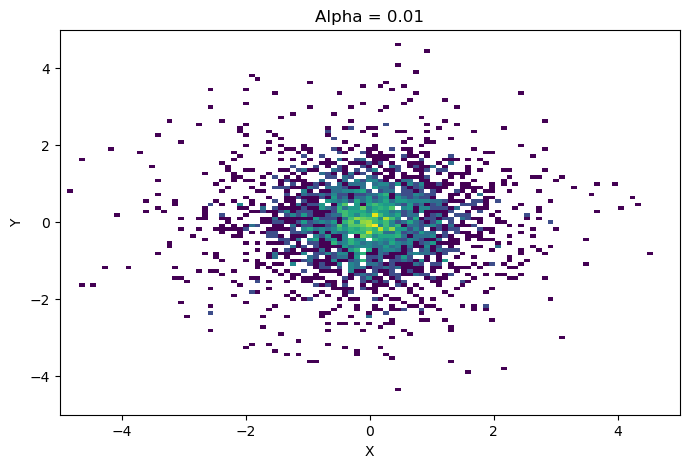

In [ ]:
from matplotlib import animation
alphas = np.linspace(0.01,0.99,101)
weights = np.array([1-alphas, alphas])
k = N

X_init = np.random.normal(0.0, 1.0, (k, d))  # initial Dirac locations
b = (
    np.ones((k,)) / k
)  # weights of the barycenter (it will not be optimized, only the locations are optimized)

fig = plt.figure(figsize=(8, 5))

def animate(i):
    plt.clf()
    print(i)
    X = ot.lp.free_support_barycenter(measures_locations, measures_weights, X_init, b, weights = weights[:,i], numItermax= 10000)
    plt.hist2d(X[:,0], X[:,1], bins=100)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Alpha = "+str(alphas[i]))
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)



anim = animation.FuncAnimation(fig, animate, frames=100, repeat=False)
anim.save("Galaxy_evolution.gif", writer='pillow', fps=10)


In [ ]:
from scipy.optimize import curve_fit

def exp(x, a, b):
    return b+a**x

n_list = np.linspace(1, 5000, 100000)


t = np.array([2, 20, 63, 162])
n = np.array([1000, 2000, 3000, 4000])

par, cov = curve_fit(exp, n, t)

t_list = exp(n_list, *par )

plt.plot(n,t)
plt.plot(n_list, t_list)